In [2]:
import math
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
DEBUG = False

In [4]:
source_folder = '1.cropped'
target_folder = '3.lines'
ksize = 5
kernel_size = (ksize, ksize)
erosion_iterations = 10
for f in range(1, 70):
    filename = 'john{:04d}.jpg'.format(f)
    sourcefile = '{}/{}'.format(source_folder, filename)
    targetfile = '{}/{}'.format(target_folder, filename)
    img = cv2.imread(sourcefile, cv2.IMREAD_GRAYSCALE)
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    eroded = cv2.erode(thresh, kernel, iterations = erosion_iterations)
    eroded = Image.fromarray(eroded)
    eroded.save(targetfile)
    print(targetfile)

3.lines/john0001.jpg
3.lines/john0002.jpg
3.lines/john0003.jpg
3.lines/john0004.jpg
3.lines/john0005.jpg
3.lines/john0006.jpg
3.lines/john0007.jpg
3.lines/john0008.jpg
3.lines/john0009.jpg
3.lines/john0010.jpg
3.lines/john0011.jpg
3.lines/john0012.jpg
3.lines/john0013.jpg
3.lines/john0014.jpg
3.lines/john0015.jpg
3.lines/john0016.jpg
3.lines/john0017.jpg
3.lines/john0018.jpg
3.lines/john0019.jpg
3.lines/john0020.jpg
3.lines/john0021.jpg
3.lines/john0022.jpg
3.lines/john0023.jpg
3.lines/john0024.jpg
3.lines/john0025.jpg
3.lines/john0026.jpg
3.lines/john0027.jpg
3.lines/john0028.jpg
3.lines/john0029.jpg
3.lines/john0030.jpg
3.lines/john0031.jpg
3.lines/john0032.jpg
3.lines/john0033.jpg
3.lines/john0034.jpg
3.lines/john0035.jpg
3.lines/john0036.jpg
3.lines/john0037.jpg
3.lines/john0038.jpg
3.lines/john0039.jpg
3.lines/john0040.jpg
3.lines/john0041.jpg
3.lines/john0042.jpg
3.lines/john0043.jpg
3.lines/john0044.jpg
3.lines/john0045.jpg
3.lines/john0046.jpg
3.lines/john0047.jpg
3.lines/john0

In [5]:
# Break up data into consecutive groups.
def consecutive_groups(x, stepsize=1):
    return [ i for i in range(1, len(x), stepsize) if x[i] != x[i-1] ]

In [6]:
def getangle(pt1, pt2):
    x1, y1 = pt1
    x2, y2 = pt2
    return np.rad2deg(np.arctan2(y2 - y1, x2 - x1))

In [7]:
def getangle_lines(eroded):
    angles = []
    height, width = np.shape(eroded)

    # Make np array and transposed to process vertical and horizontal lines.
    a = np.array(eroded)
    b = np.transpose(a)

    for x in [a, b]:
        multiplier = 1 if len(x[0]) == width else -1 # 1 for normal, -1 for transposed.
        top = consecutive_groups(x[0])
        bottom = consecutive_groups(x[-1])

        # Only look at the first and last pair.
        for i in [0, 1, -2, -1]:
            print(getangle((top[i], 0), (bottom[i], len(x)))) if DEBUG and top and bottom else None
            angle = multiplier * (getangle((top[i], 0), (bottom[i], len(x))) - 90) if top and bottom else 0
            # Only take angles < 2 degrees.
            angles.append(angle) if abs(angle) < 2 else None

    avg_angle = sum(angles)/len(angles)

    print(angles) if DEBUG else None
    print(avg_angle) if DEBUG else None
    return avg_angle

In [8]:
def rotate_image(img, angle):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img.copy(), M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

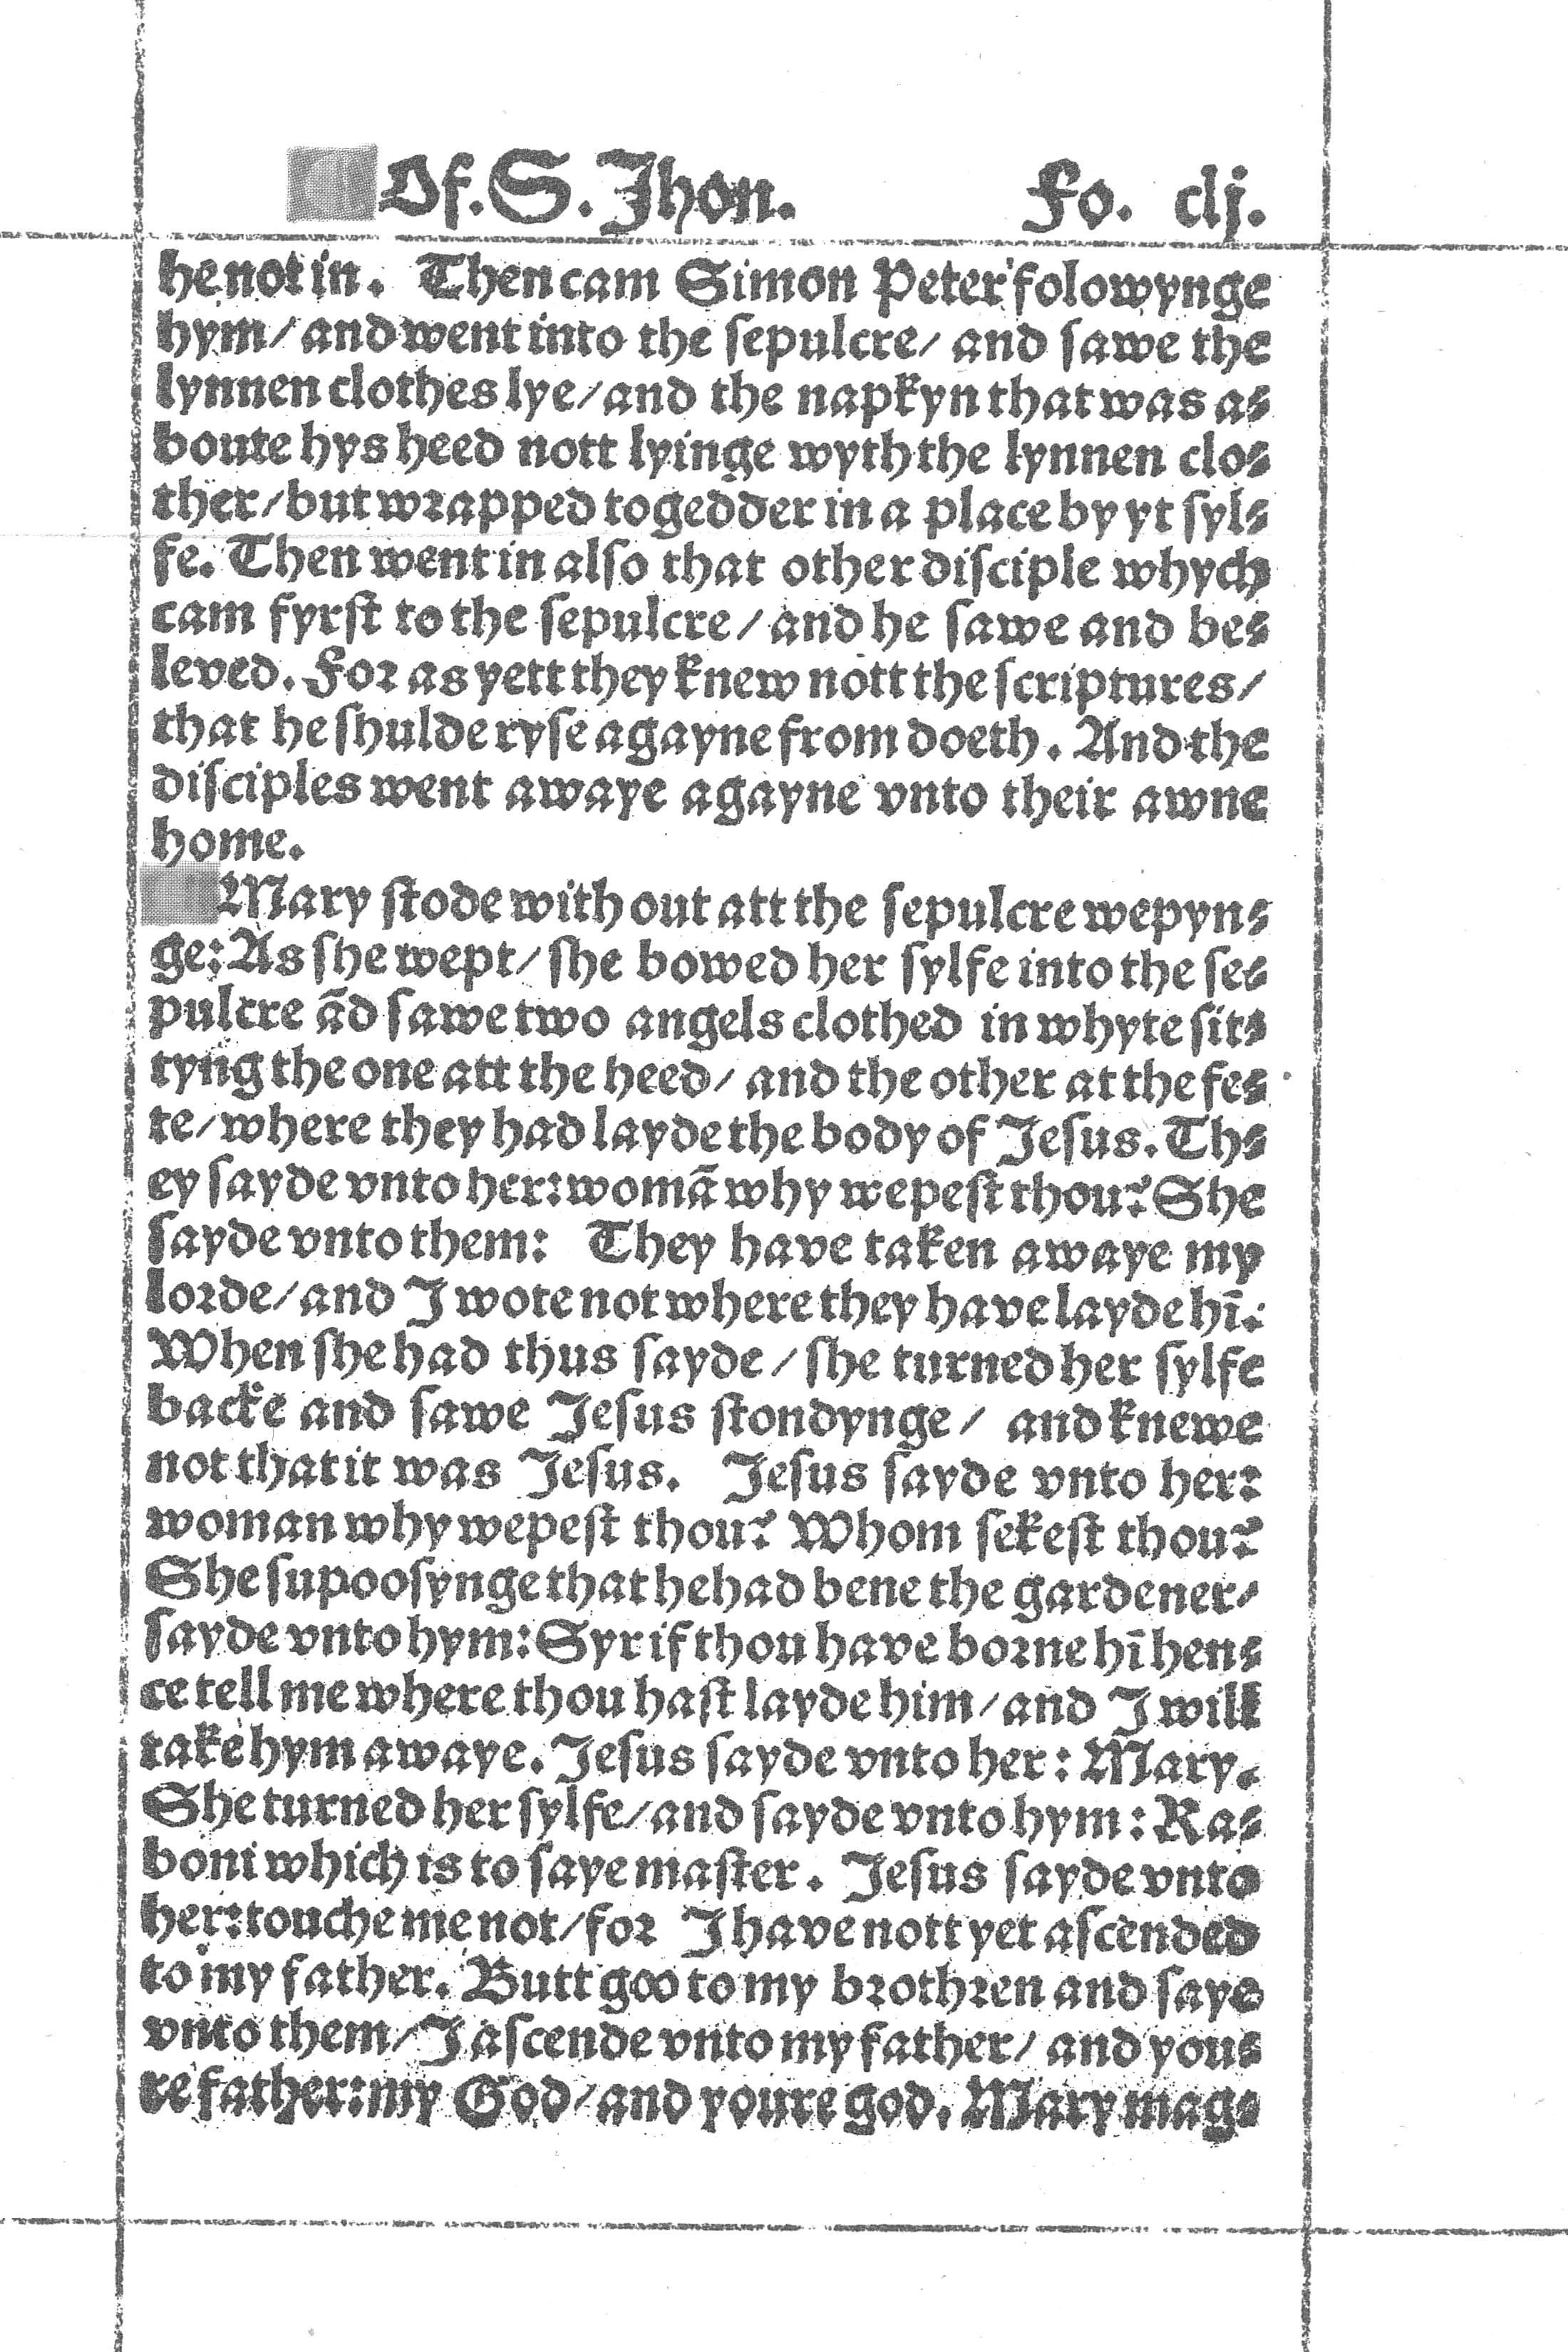

In [241]:
img = cv2.imread('1.cropped/john0065.jpg', cv2.IMREAD_GRAYSCALE)

ksize = 5
kernel_size = (ksize, ksize)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

ret, thresh = cv2.threshold(img.copy(), 127, 255, cv2.THRESH_BINARY)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
eroded = cv2.erode(thresh, kernel, iterations = 10)
Image.fromarray(img) if DEBUG else None

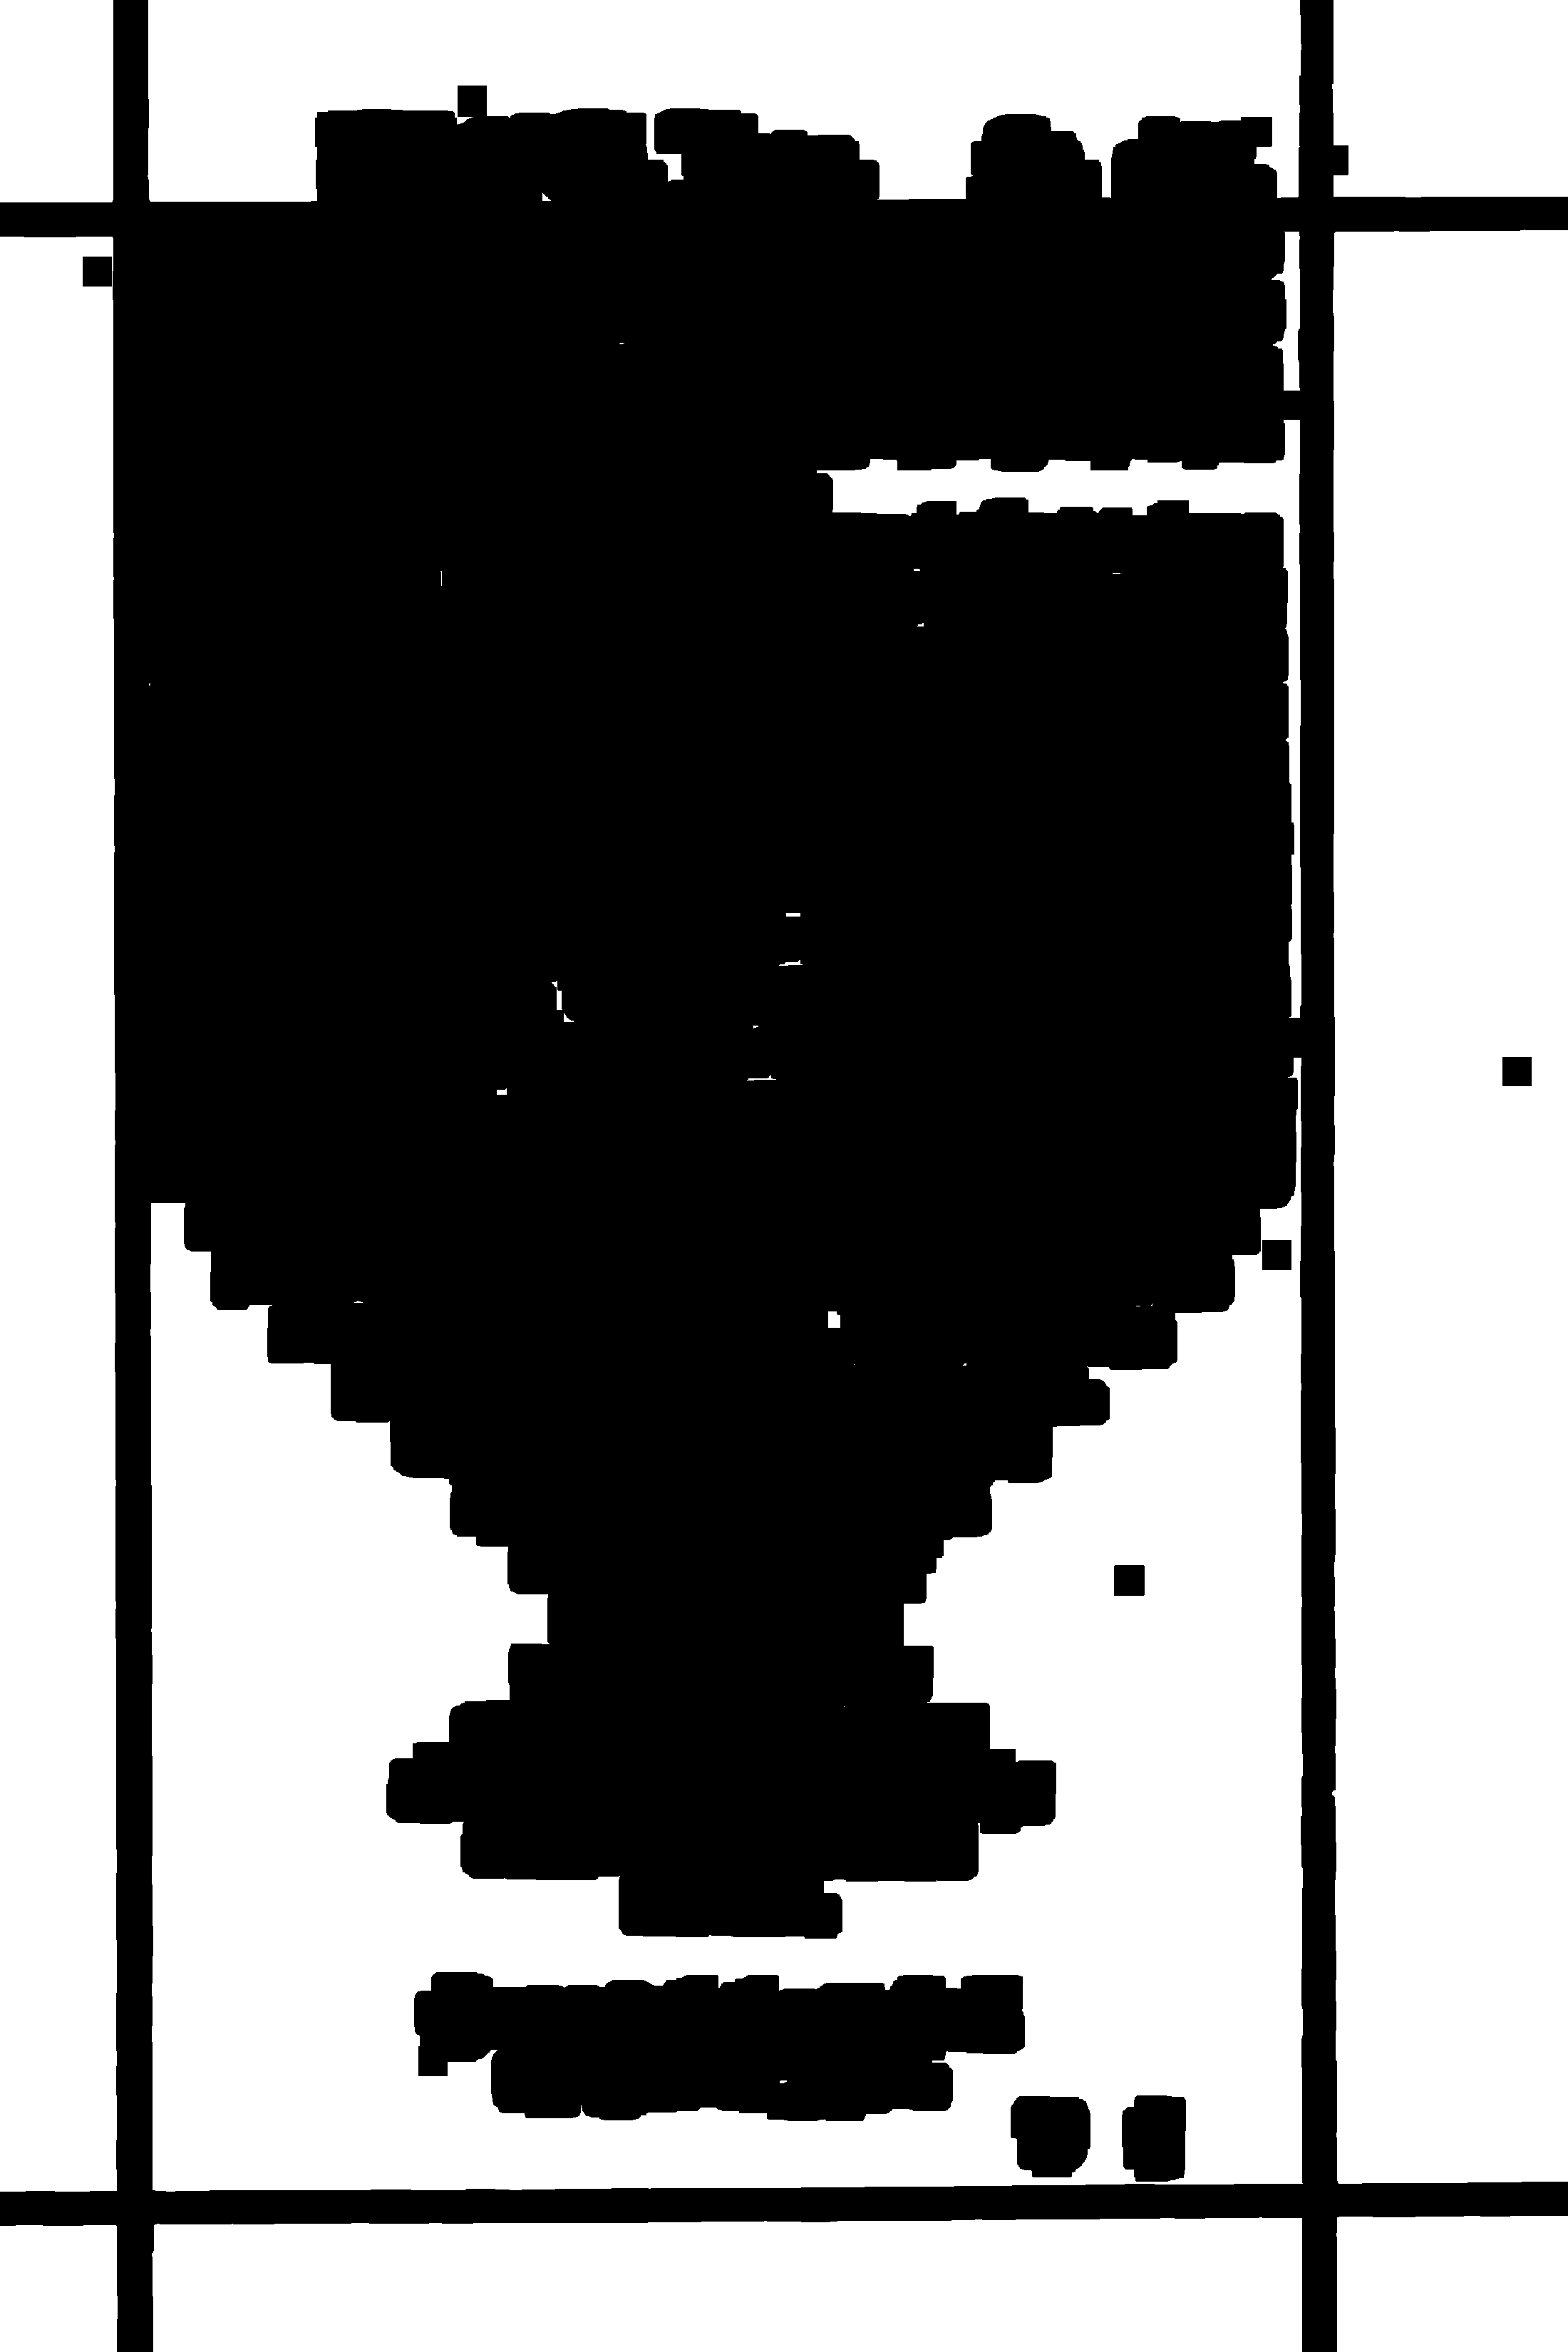

In [256]:
Image.fromarray(eroded)

In [249]:
angle = getangle_lines(eroded)

90.52085637450196
90.50349540456966
90.53821724878972
90.53821724878972
89.50518511526724
89.55726869737889
89.58331076820643
89.58331076820643
[0.5208563745019603, 0.5034954045696622, 0.5382172487897208, 0.5382172487897208, 0.4948148847327616, 0.4427313026211124, 0.4166892317935691, 0.4166892317935691]
0.48396386594900953


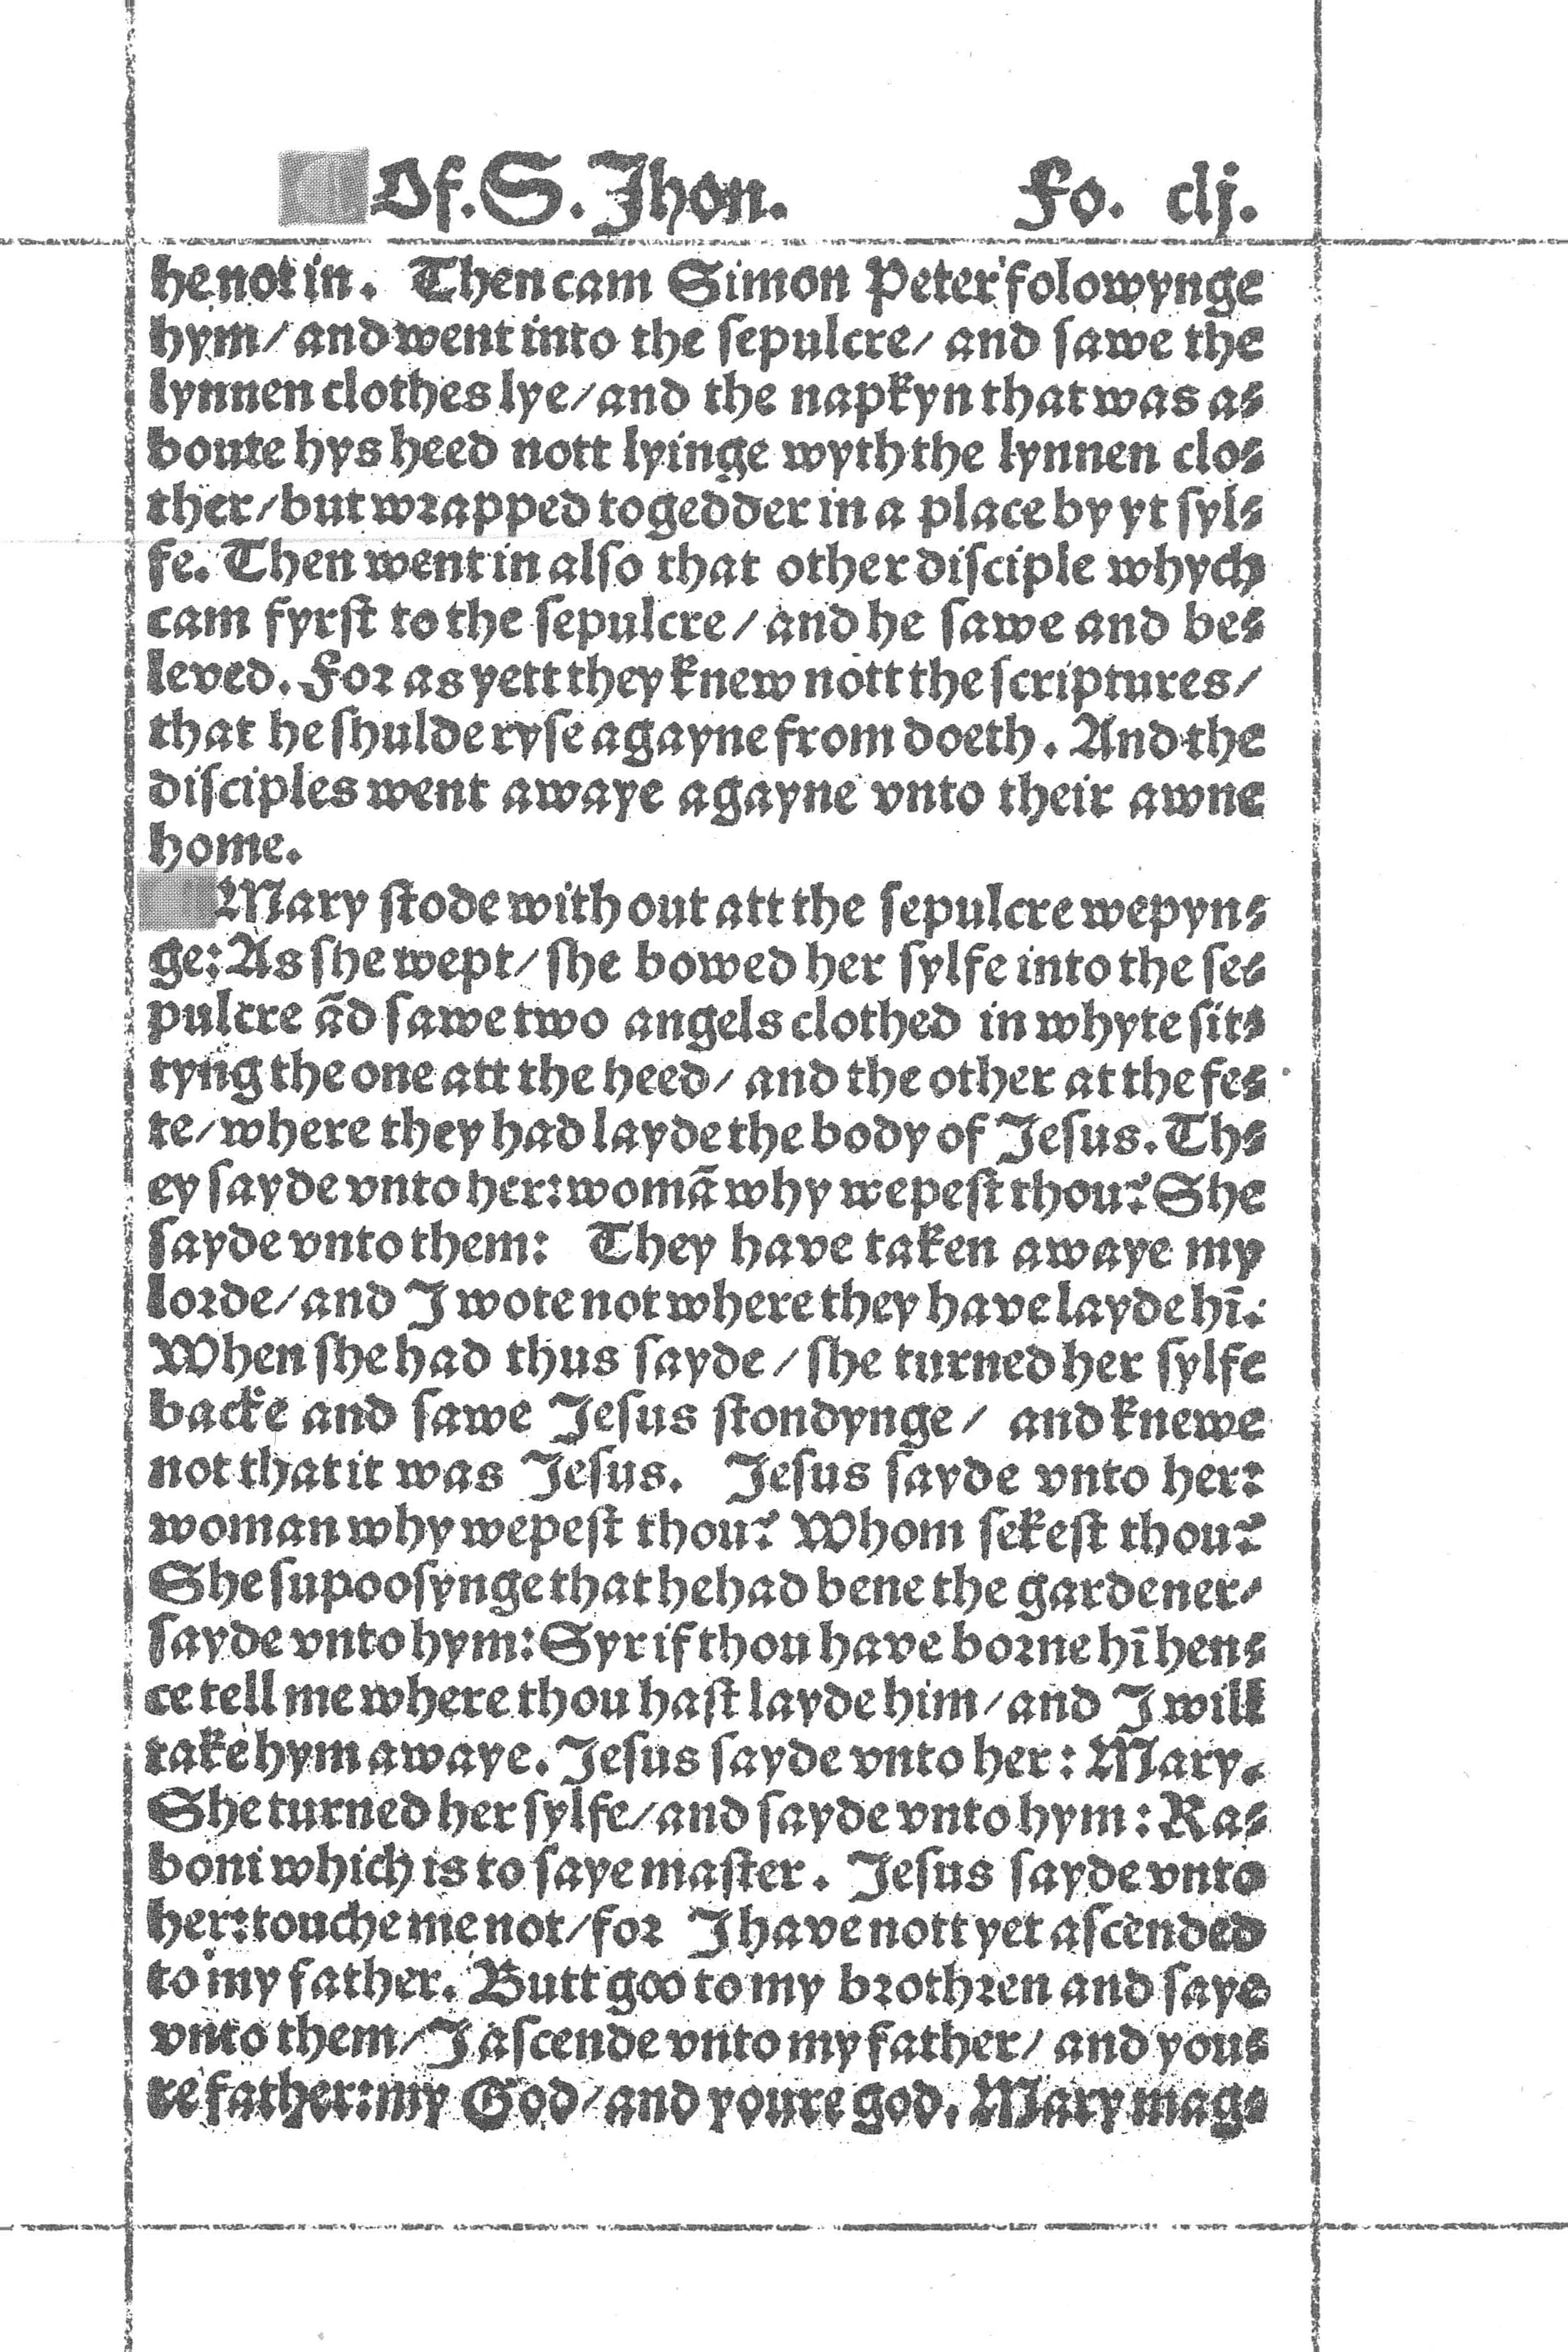

In [250]:
rotated = rotate_image(img, angle)
Image.fromarray(rotated) if DEBUG else None

In [14]:
ksize = 5
kernel_size = (ksize, ksize)
erosion_iterations = 10
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

for f in range(1, 70):
    filename = "john{:04d}.jpg".format(f)
    inpath = "1.cropped/{}".format(filename)
    outpath = "4.rotated/{}".format(filename)
    
    img = cv2.imread(inpath, cv2.IMREAD_GRAYSCALE)
#     img = adjust_gamma(img, 0.5)
    ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    eroded = cv2.erode(thresh, kernel, iterations = erosion_iterations)
    angle = getangle_lines(eroded)
    
    img = cv2.imread(inpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rotated = rotate_image(img, angle)
    y = Image.fromarray(rotated)
    y.save(outpath)
    print(outpath)

4.rotated/john0001.jpg
4.rotated/john0002.jpg
4.rotated/john0003.jpg
4.rotated/john0004.jpg
4.rotated/john0005.jpg
4.rotated/john0006.jpg
4.rotated/john0007.jpg
4.rotated/john0008.jpg
4.rotated/john0009.jpg
4.rotated/john0010.jpg
4.rotated/john0011.jpg
4.rotated/john0012.jpg
4.rotated/john0013.jpg
4.rotated/john0014.jpg
4.rotated/john0015.jpg
4.rotated/john0016.jpg
4.rotated/john0017.jpg
4.rotated/john0018.jpg
4.rotated/john0019.jpg
4.rotated/john0020.jpg
4.rotated/john0021.jpg
4.rotated/john0022.jpg
4.rotated/john0023.jpg
4.rotated/john0024.jpg
4.rotated/john0025.jpg
4.rotated/john0026.jpg
4.rotated/john0027.jpg
4.rotated/john0028.jpg
4.rotated/john0029.jpg
4.rotated/john0030.jpg
4.rotated/john0031.jpg
4.rotated/john0032.jpg
4.rotated/john0033.jpg
4.rotated/john0034.jpg
4.rotated/john0035.jpg
4.rotated/john0036.jpg
4.rotated/john0037.jpg
4.rotated/john0038.jpg
4.rotated/john0039.jpg
4.rotated/john0040.jpg
4.rotated/john0041.jpg
4.rotated/john0042.jpg
4.rotated/john0043.jpg
4.rotated/j